**Introduction*
-

- Note! This dataset is taken from Kaggle by `NIDULA ELGIRIYEWITHANA`, top 1000 streamed Spotify songs on 2023. 

- This study analyzes the top 1000 streamed songs on Spotify to investigate whether the type of artist—solo, duo, or group—affects streaming performance and whether any variables listed below will contribute to a song's success. Utilizing data from these top tracks, I categorize each song by streaming counts into ranks - top 10, top 100, and top 500 to determine trends across different artist types. I will answer three questions, which are evaluated from the main question.


**Question:**
-
- `Main Question`: Artist impact: Analyze how artist involvement and attributes relate to a song's success.

  1. How does the performance vary among solo artists, duos, and groups within the top 10, top 50, top 100, and top 500 ranked songs on Spotify?

  2. What song characteristics like key and bpm within the top 10, top 50, top 100, or top 500?
  
  3. Does the release date of a song correlate with its streaming success?

**Results**
-
**Question 1**

**Hypothesis**
-
1. Songs with multiple artists perform better on streaming platforms than songs by solo artists.



**Variables**
-
 - **response variable**
      - `streams` - Total number of streams on Spotify
 - **Observer**
      - `artists_name`
      - `in_spotify_playlists` - Number of Spotify playlists the song is included in

      - `in_spotify_charts` - Presence and rank of the song on Spotify charts

      - `bpm` - Beats per minute, a measure of song tempo

      - `key`

      - `mode` - Mode of the song (major or minor)

      - `danceability_%` - Percentage indicating how suitable the song is for dancing

      - `valence_%` - Positivity of the song's musical content

      - `energy_%` - Perceived energy level of the song

      - `acousticness_%` - Amount of acoustic sound in the song

      - `liveness_%` - Presence of live performance elements

      - `speechiness_%` - Amount of spoken words in the song

      - `released_date`
      
      - `artists_type` - Solo (artists_count = 1), Duo (artists_count = 2), Group (artists_count > 3)

**Methodology**
 - Collect data 
    - From "top-spotify-songs-2023" (Kaggle)
 - Wrangle data 
    - Cleaning
         - Remove variables that are not related to our topic(Spotify).
         - Remove any rows with empty data
 - Explore 
    - data using available techniques
 - Visualization
    - data to uncover insightful discoveries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
spotify_data = pd.read_csv('data/spotify-2023.csv', encoding = 'latin1')

# Display data types inferred by pandas
spotify_data.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
spotify_data.shape

(953, 24)

In [4]:
spotify_data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [5]:
print(spotify_data.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [6]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

**Data Preprocessing**
-

**Drop the row while `streams` contains unknown values, found it when converting the streams column into integer**

In [7]:
for index, stream in spotify_data['streams'].items():
    if not stream.isnumeric():
        print(index, stream)

spotify_data = spotify_data.drop(574, axis = 0)

574 BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [8]:
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'])

In [10]:
# spotify_data.isna().sum()
missing_data = spotify_data.isna()
has_missing_value = missing_data.any()

for column, missing in has_missing_value.items():
    if missing:
        count = missing_data.sum()[column]
        print(f'Column {column} has {count} missing values')

Column in_shazam_charts has 50 missing values
Column key has 95 missing values


In [11]:
spotify_data.dropna(axis = 0, how = 'any', inplace = True)

In [12]:
spotify_data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

**Since there are many data, so make it specific I will remove the variables that is not related to spotify**

In [13]:
new_spotify_data = spotify_data.loc[:,:]

In [14]:
playlists_col = new_spotify_data.loc[:, ['in_apple_playlists','in_deezer_playlists']]
# Drop those columes with playlists
new_spotify_data = new_spotify_data.drop(playlists_col.columns, axis = 1)

In [15]:
charts_col = new_spotify_data.loc[:, ['in_apple_charts','in_deezer_charts','in_shazam_charts']]

# Drop those columes with chart
new_spotify_data.drop(charts_col.columns, axis = 1, inplace = True)

In [16]:
new_spotify_data['released_date'] = new_spotify_data.loc[:, 'released_year':'released_day'].astype(str).apply(lambda x:"-".join(x), axis = 1)

In [17]:
# Drop those date
new_spotify_data.drop(['released_year','released_month','released_day', 'track_name'], axis = 1, inplace = True)

In [18]:
def convert_artist_count(count):
    if count == 1:
        return 'Solo'
    elif count == 2:
        return 'Duo'
    else:
        return 'Group'
    
new_spotify_data['artists_type'] = new_spotify_data['artist_count'].apply(convert_artist_count).astype('category')

new_spotify_data.drop(['artist_count'], axis = 1, inplace = True)


In [31]:
artists_type_counts = new_spotify_data.groupby('artists_type')['artists_type'].count()
total_artists_type = artists_type_counts.sum()
proportion = (artists_type_counts / total_artists_type) * 100
# Convert Series to DataFrame with appropriate column names
proportion_df = pd.DataFrame({
    'artists_type': proportion.index,
    'proportion_%': proportion.values
})
proportion_df

,artists_type,proportion_%
0,Duo,27.450980
1,Group,12.132353
2,Solo,60.416667


In [32]:
new_spotify_data

,artist(s)_name,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,artists_type
0,"Latto, Jung Kook",553,147,141381703,125,B,Major,80,89,83,31,0,8,4,2023-7-14,Duo
1,Myke Towers,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4,2023-3-23,Solo
2,Olivia Rodrigo,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6,2023-6-30,Solo
3,Taylor Swift,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15,2019-8-23,Solo
4,Bad Bunny,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6,2023-5-18,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,953,0,91473363,144,A,Major,60,24,39,57,0,8,3,2022-11-3,Solo
949,Taylor Swift,1180,0,121871870,166,F#,Major,42,7,24,83,1,12,6,2022-10-21,Solo
950,"Feid, Paulo Londra",573,0,73513683,92,C#,Major,80,81,67,4,0,8,6,2022-11-3,Duo
951,"Feid, Sech, Jhayco",1320,0,133895612,97,C#,Major,82,67,77,8,0,12,5,2022-10-20,Group


**Visualization**
-

**1. Songs with multiple artists perform better on the number of `streams`?**
- In this case, my observe variables are `artist_count`, `in_spotify_playlists`, `in_spotify_charts`, and `streams`. The other variables will be discussed in question 2 and question 3. Moreover, since there is a huge gap on distribution for each artist_type, so I will seperate them into top_10, top_50, top_100, top_500.

In [30]:
%matplotlib inline

In [33]:
artists_set = new_spotify_data[['artists_type','in_spotify_playlists','in_spotify_charts','streams']].copy()

print(artists_set)

print(artists_set.dtypes)

    artists_type  in_spotify_playlists  in_spotify_charts    streams
0            Duo                   553                147  141381703
1           Solo                  1474                 48  133716286
2           Solo                  1397                113  140003974
3           Solo                  7858                100  800840817
4           Solo                  3133                 50  303236322
..           ...                   ...                ...        ...
948         Solo                   953                  0   91473363
949         Solo                  1180                  0  121871870
950          Duo                   573                  0   73513683
951        Group                  1320                  0  133895612
952         Solo                   782                  2   96007391

[816 rows x 4 columns]
artists_type            category
in_spotify_playlists       int64
in_spotify_charts          int64
streams                    int64
dtype: object


In [36]:
top_10 = artists_set.sort_values('streams', ascending=False).head(10)

top_50 = artists_set.sort_values('streams', ascending=False).head(50)

top_100 = artists_set.sort_values('streams', ascending=False).head(100)

top_500 = artists_set.sort_values('streams', ascending=False).head(500)

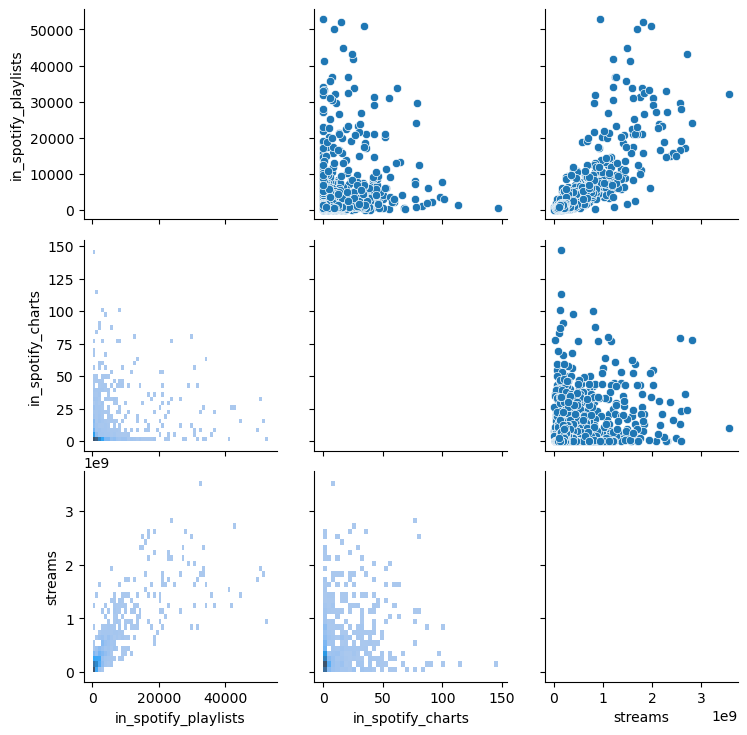

In [37]:
plot = sns.PairGrid(artists_set)
plot.map_lower(sns.histplot)
plot.map_upper(sns.scatterplot)

`in_spotify_playlists` Versus `streams`
- A visual correlation between two variables shows a linear relationship, where a higher value of all_playlists is associated with higher streams. I will use regression analysis to see how well this relationship is. 

`in_spotify_playlists` Versus `in_spotify_charts`
- Does not show a clear trend, but there is a cloud at the beginning, which suggests that many songs might get playlisted, but only subset presence and rank in chart. But, here is the question: Why the song is playlisted, but not in chart?

`streams` Versus `in_spotify_charts`
- Shows that higher chart positions correlate with higher streams, but the relationship is not perfectly linear.

**Analysis: in_spotify_playlists**
-

In [42]:
print("Descriptive Statistics for Spotify Playlists Presence:")
for subset, label in [(top_10, 'Top 10'), (top_50, 'Top 50'), (top_100, 'Top 100'), (top_500, 'Top 500')]:
    print(f"{label} - Mean: {subset['in_spotify_playlists'].mean()}, Median: {subset['in_spotify_playlists'].median()}, Std: {subset['in_spotify_playlists'].std()}")

Descriptive Statistics for Spotify Playlists Presence:
Top 10 - Mean: 24046.4, Median: 21540.0, Std: 9203.017212970006
Top 50 - Mean: 23920.08, Median: 22826.5, Std: 11400.41249314592
Top 100 - Mean: 19241.49, Median: 16843.0, Std: 12022.7218783242
Top 500 - Mean: 7267.992, Median: 3711.5, Std: 9078.580600698704


In [43]:
data_frames = [top_10, top_50, top_100, top_500]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 500']
for df, label in zip(data_frames, labels):
    df['rank_category'] = label

combined_data = pd.concat(data_frames)

combined_data

,artists_type,in_spotify_playlists,in_spotify_charts,streams,rank_category
179,Solo,32181,10,3562543890,Top 10
41,Duo,24094,78,2808096550,Top 10
162,Group,43257,24,2713922350,Top 10
84,Duo,17050,36,2665343922,Top 10
140,Solo,18986,23,2594040133,Top 10
...,...,...,...,...,...
840,Solo,5328,0,195918494,Top 500
865,Solo,5263,0,195628667,Top 500
215,Solo,2915,30,195576623,Top 500
421,Group,1602,0,195516622,Top 500


**Question2**
-
**2. What is the proportion of each artist_type in Top10, Top50, Top100, Top200, and Top500? And how well does other factors impact to the stream as well?**

In [69]:
data_with_rank = new_spotify_data.drop(['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts'], axis=1)
data_with_rank

,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,2,141381703,125,B,Major,80,89,83,31,0,8,4,2023-7-14
1,1,133716286,92,C#,Major,71,61,74,7,0,10,4,2023-3-23
2,1,140003974,138,F,Major,51,32,53,17,0,31,6,2023-6-30
3,1,800840817,170,A,Major,55,58,72,11,0,11,15,2019-8-23
4,1,303236322,144,A,Minor,65,23,80,14,63,11,6,2023-5-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,91473363,144,A,Major,60,24,39,57,0,8,3,2022-11-3
949,1,121871870,166,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,2,73513683,92,C#,Major,80,81,67,4,0,8,6,2022-11-3
951,3,133895612,97,C#,Major,82,67,77,8,0,12,5,2022-10-20
